**Input Data:** There are two files in this folder, training_set and test_set.
- Training Set: Contains almost one year of historical electricity price data presented through multiple features from column B:L. The target column contains electricity prices per hour.
- Test Set: Contains all features for four days and the target value is not given.


The goal is designing two AI models, **one deep model** and **one ensemble model**, based on training data and predicting target values during the test set.
Feel free to:
1. Create new features and add it to the data set or remove existing ones from the data set.
2. Create the internal model architecture, parameters and fine-tuning process.


What you need to deliver:
1. In a word document, describe in your own words and in detail the data exploration and feature engineering steps and methods that you used.
2. In the same word document, describe in your own words and in detail the model selection, design, and fine-tuning process that you used.
3. Verify your data and submit an excel containing the forecasted values for the test data sets.
4. Submit one or more, .py/.m file(s), for each step.

In [1]:
# import libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_excel('Training Set.xlsx')
test_df = pd.read_excel("Test Set.xlsx")

In [3]:
train_df.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75


In [4]:
train_df.shape

(7584, 13)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 7584 non-null   datetime64[ns]
 1   Hour                 7584 non-null   int64         
 2   Weekday              7584 non-null   int64         
 3   Is Working Day       7584 non-null   int64         
 4   Previous Hour Price  7584 non-null   float64       
 5   SDSH DAP             7584 non-null   float64       
 6   SDSH Volume          7584 non-null   float64       
 7   Sgn0 VolumeDir       7584 non-null   float64       
 8   P24HA Price          7584 non-null   float64       
 9   PDSH Price           7584 non-null   float64       
 10  PWSH Price           7584 non-null   float64       
 11  PWA Price            7584 non-null   float64       
 12  target               7584 non-null   float64       
dtypes: datetime64[ns](1), float64(9),

In [6]:
test_df.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,NaN
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,NaN


In [7]:
test_df.shape

(96, 13)

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 96 non-null     datetime64[ns]
 1   Hour                 96 non-null     int64         
 2   Weekday              96 non-null     int64         
 3   Is Working Day       96 non-null     int64         
 4   Previous Hour Price  96 non-null     float64       
 5   SDSH DAP             96 non-null     float64       
 6   SDSH Volume          96 non-null     float64       
 7   Sgn0 VolumeDir       96 non-null     float64       
 8   P24HA Price          96 non-null     float64       
 9   PDSH Price           96 non-null     float64       
 10  PWSH Price           96 non-null     float64       
 11  PWA Price            96 non-null     float64       
 12  target               0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), int

In [9]:
train_df.describe().round(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,7584.00,7584.0,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00
mean,12.50,4.0,4.57,2429.48,2327.52,1587.82,0.02,2433.18,2426.83,2464.85,2442.33,2429.37
std,6.92,2.0,1.39,1590.72,1419.11,213.11,73.09,1125.33,1564.73,1605.18,870.87,1590.75
min,1.00,1.0,1.00,124.16,87.38,1079.80,-465.20,1145.51,124.16,124.16,1409.44,124.16
25%,6.75,2.0,4.00,1664.40,1651.85,1400.98,-50.42,1722.83,1666.84,1676.70,1813.92,1664.35
50%,12.50,4.0,5.00,1945.81,1922.32,1583.30,-16.20,2029.11,1951.46,1967.16,2060.33,1945.70
75%,18.25,6.0,5.00,2568.55,2507.29,1757.62,43.30,2725.68,2595.94,2603.57,2823.23,2568.55
max,24.00,7.0,8.00,10117.86,9548.44,2192.30,661.20,7691.48,10117.86,10117.86,5520.09,10117.86


In [10]:
test_df.describe().round(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,0.0
mean,12.50,4.75,4.00,1550.60,1549.67,1638.72,-1.76,1584.22,1520.71,1358.63,1546.61,NaN
std,6.96,2.29,1.23,260.32,241.88,209.62,77.61,83.06,367.22,512.76,41.11,NaN
min,1.00,1.00,2.00,1204.60,1225.07,1303.10,-120.40,1395.11,184.18,182.17,1458.82,NaN
25%,6.75,4.00,3.50,1357.13,1393.89,1447.88,-50.23,1515.97,1378.53,1214.70,1502.39,NaN
50%,12.50,5.50,4.50,1493.88,1509.78,1588.10,-24.15,1626.19,1483.94,1472.90,1554.20,NaN
75%,18.25,6.25,5.00,1566.80,1598.56,1822.40,19.70,1645.19,1579.28,1539.01,1584.21,NaN
max,24.00,7.00,5.00,2311.63,2372.21,2025.70,260.60,1668.11,2311.19,2957.65,1591.16,NaN


In [11]:
print('Train Dataset time period: ',train_df['Date'].max() - train_df['Date'].min())
print('Test Dataset time period : ',test_df['Date'].max() - test_df['Date'].min())

Train Dataset time period:  315 days 23:00:00
Test Dataset time period :  3 days 23:00:00


In [12]:
#let's break date to years, months
train_df['month'] = train_df['Date'].apply(lambda date:date.month)
train_df.head(5)

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68,1
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40,1
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89,1
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42,1
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75,1


In [13]:
#let's break date to years, months
test_df['month'] = test_df['Date'].apply(lambda date:date.month)
test_df.head(5)

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN,11
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN,11
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN,11
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,NaN,11
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,NaN,11


### Baseline Model — Multi-Linear Regression (MLR)

In [14]:
# Generate dummy columns (while dropping first dummy col (drop_first = True) to prevent collinearity in MLR)
train_df_lr = train_df.copy()
train_df_lr.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68,1
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40,1
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89,1
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42,1
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75,1


In [15]:
train_df_lr.drop({'Date'} ,axis = 1,  inplace = True)
train_df_lr.head(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68,1
1,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40,1


In [16]:
# Separate dependent(target) variable and independent variables
X = train_df_lr.drop(['target'], axis = 1)
y = train_df_lr['target']

In [17]:
from sklearn.model_selection import train_test_split

# Perform train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [18]:
# Carry out standardization on numerical columns

from sklearn.preprocessing import StandardScaler

numerical_cols = ['Hour', 'Weekday' ,'Is Working Day' ,'Previous Hour Price','SDSH DAP','SDSH Volume', 'Sgn0 VolumeDir' ,
                  'P24HA Price' , 'PDSH Price' , 'PWSH Price' , 'PWA Price','month']

scaler = StandardScaler() 


X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.fit_transform(X_val[numerical_cols])

In [19]:
X_train.head(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
6318,-0.791742,-1.521534,-0.401978,-0.581625,-0.596225,-1.629876,-0.279126,-0.441564,-0.724742,-0.722963,-0.123980,1.020213
7255,-0.646792,0.489938,0.312794,-0.726712,-0.475049,-0.577834,1.387219,-0.755956,-0.487475,-0.077200,-0.885346,1.686303


In [20]:
from sklearn.linear_model import LinearRegression

# Instantiate a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred_val = linear_reg.predict(X_val)
y_pred_val

array([2117.99272226, 1681.34633959, 1562.49239156, ..., 2484.29260565,
       2075.98175647, 8146.11764099])

In [22]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,2041.18,2117.992722
1,1475.46,1681.346340
2,1579.12,1562.492392
3,1552.67,1510.391689
4,1721.17,1702.394862
...,...,...
1512,2441.90,2186.068588
1513,1685.98,1605.145522
1514,2535.42,2484.292606
1515,2100.73,2075.981756


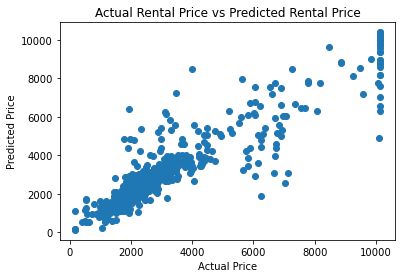

In [23]:
# Visualizing actual prices vs predicted values
plt.scatter(y_val, y_pred_val)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Rental Price vs Predicted Rental Price")
plt.show()

## Performing checks for multi-linear regression assumptions

1) Equal Error Variance (Homoscedasticity)

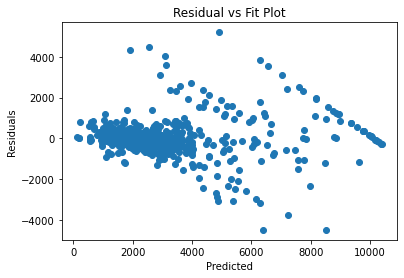

In [24]:
# Residual vs fit plot
plt.scatter(y_pred_val, y_val - y_pred_val)
plt.title("Residual vs Fit Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Homoscedasticity check shows some type of curvilinear pattern in the residual vs fit plot

2) Normal Error (Multivariate Normality)

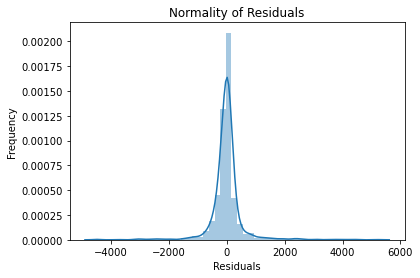

In [25]:
# Normality of residuals
sns.distplot(y_val-y_pred_val)
plt.title("Normality of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

The residuals are normally distributed, thus the normality assumption is satisfied

3) Multi-Collinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [27]:
calc_vif(X_train)

,variables,VIF
0,Hour,1.650085
1,Weekday,1.262057
2,Is Working Day,1.279491
3,Previous Hour Price,3.414653
4,SDSH DAP,3.014194
5,SDSH Volume,2.287269
6,Sgn0 VolumeDir,1.331840
7,P24HA Price,3.115340
8,PDSH Price,2.013569
9,PWSH Price,1.707085


VIF values all below 10, so we pass this check.

4) Linearity

In [28]:
cols = X.columns

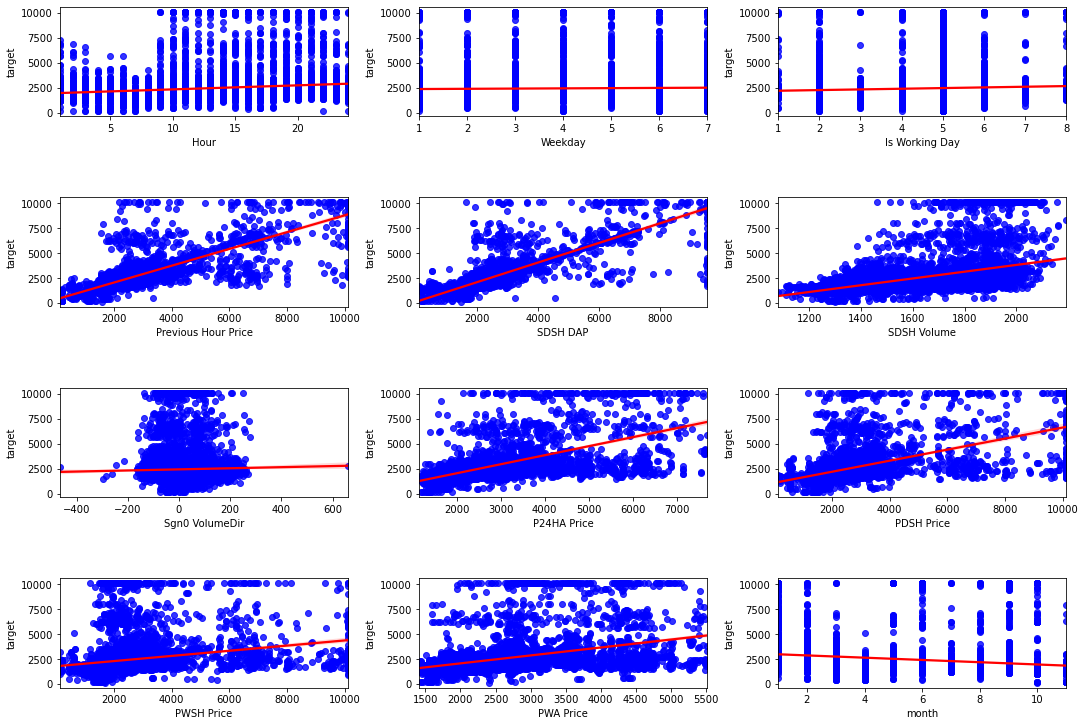

In [29]:
X_plot = X.loc[:,cols]
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

axs = axs.flatten()
for i, k in enumerate(numerical_cols):
    sns.regplot(y=y, x=X_plot[k], ax=axs[i], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [30]:
# Display coefficients (Indicator for feature importance)
linear_reg_features = pd.DataFrame([X_train.columns, linear_reg.coef_]).T
linear_reg_features = linear_reg_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
linear_reg_features.sort_values(by='Importance Score', ascending = False)

,Feature,Importance Score
4,SDSH DAP,811.047
3,Previous Hour Price,617.702
6,Sgn0 VolumeDir,110.948
7,P24HA Price,81.3785
8,PDSH Price,79.7053
5,SDSH Volume,49.1757
9,PWSH Price,7.23487
11,month,-0.318515
0,Hour,-7.70042
1,Weekday,-11.2856


In [31]:
from sklearn import metrics

# Store results as dataframe
lr_dict = {'Model':'Multi-Linear Regression',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

In [32]:
linear_reg_metrics = pd.DataFrame.from_dict(lr_dict, orient = 'index').T
linear_reg_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Multi-Linear Regression,0.857144,0.856004,280.904,350955,592.415


## On test unseen data

In [36]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test[numerical_cols] = scaler.fit_transform(test[numerical_cols])
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,-1.661325,0.109764,0.816497,-0.187823,-0.199346,-0.359765,-0.632577,0.458700,-0.019155,-1.499269,-2.146682,0.0
1,-1.516862,0.109764,0.816497,-0.288263,-0.169465,-0.558301,-0.513418,0.439659,-0.090548,-0.694259,-2.018304,0.0
2,-1.372399,0.109764,0.816497,-0.273164,-0.708325,-0.816301,-0.674024,0.435740,-0.416413,-0.652897,-1.949119,0.0
3,-1.227936,0.109764,0.816497,-0.255247,-0.888817,-0.937148,-0.303593,0.494191,-0.544307,-0.611535,-1.882329,0.0
4,-1.083473,0.109764,0.816497,-0.898088,-0.914252,-0.928516,0.046115,0.492255,-0.556461,-0.570173,-1.842839,0.0


In [37]:
y_pred_test = linear_reg.predict(test)
y_pred_test

array([2131.42963327, 2091.98100861, 1605.26988017, 1497.51765814,
       1116.29862305, 1254.59300367, 1823.37434476, 2157.99143318,
       3370.60318214, 4685.0822919 , 6667.37769626, 3881.14520273,
       3290.22209563, 4995.90793698, 5531.98222576, 4243.70924163,
       3145.16222721, 4745.19968957, 3607.45334828, 2059.97738787,
       2056.44675653, 3710.07964463, 4098.58597747, 2368.92960133,
       2756.20711325, 2259.14352887, 2153.449257  , 2122.7973152 ,
       1811.85963207, 1249.62941662, 1435.68752511, 1716.94662204,
       2284.63359494, 1946.43984407, 2775.14909588, 2982.75384217,
       2539.11868828, 3237.14946247, 4450.50823191, 4013.06719916,
       3046.19818447, 4128.62097916, 3994.15888152, 3090.07561629,
       3848.57815533, 4472.51317658, 5699.46968798, 2855.78313471,
       2095.76208417, 1966.43290592, 2144.75046696, 1461.47550935,
       1661.3245665 , 1454.45661748, 1513.85584244,  548.1370444 ,
       2684.92205107, 3156.79738023, 3849.28669182, 2005.42795

In [38]:
test_df['target'] = y_pred_test
test_df.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,2131.429633,11
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,2091.981009,11
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,1605.269880,11
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,1497.517658,11
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,1116.298623,11


### Modeling - Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [40]:
# Create the parameter grid for GridSearchCV
rf_param_grid = {
    'max_depth': [80, 90, 100], # Maximum number of levels in each decision tree
    'max_features': ['auto', 'sqrt', 'log2'], # Maximum number of features considered for splitting a node
    'min_samples_leaf': [1, 3, 4, 5], # Minimum number of data points allowed in a leaf node
    'n_estimators': [100, 300, 600] # Number of trees in the forest
}

In [41]:
# Instantiate a Random Forest Regressor
rf_reg = RandomForestRegressor()

In [42]:
# Setup grid search
rf_grid = GridSearchCV(estimator = rf_reg, param_grid = rf_param_grid, cv=5, n_jobs=-1, verbose=2)

In [43]:
# Fit the grid search model on training dataset
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 32.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4, 5],
                         'n_estimators': [100, 300, 600]},
             verbose=2)

In [44]:
rf_grid.best_params_

{'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [45]:
# Get best RF estimator based on best parameters
rf_best = rf_grid.best_estimator_

# Use RF regressor to predict on test set
y_pred_val = rf_best.predict(X_val)
y_pred_val

array([2043.6567    , 1576.861     , 1577.87790571, ..., 2412.0465    ,
       2077.6675    , 8507.04203904])

In [46]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,2041.18,2043.656700
1,1475.46,1576.861000
2,1579.12,1577.877906
3,1552.67,1577.120452
4,1721.17,1796.681233
...,...,...
1512,2441.90,2241.864800
1513,1685.98,1736.836200
1514,2535.42,2412.046500
1515,2100.73,2077.667500


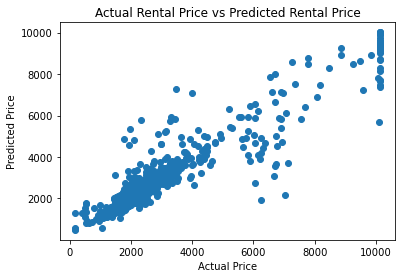

In [47]:
# Visualizing actual prices vs predicted values
plt.scatter(y_val, y_pred_val)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Rental Price vs Predicted Rental Price")
plt.show()

In [48]:
# Store results as dataframe
rf_dict = {'Model':'Random Forest Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

rf_reg_metrics = pd.DataFrame.from_dict(rf_dict, orient = 'index').T

# Display model performance metrics
rf_reg_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Random Forest Regressor,0.880056,0.879099,245.179,294666,542.831


In [50]:
rf_features = pd.DataFrame([X_train.columns, rf_best.feature_importances_]).T
rf_features = rf_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
rf_features.sort_values(by = 'Importance Score', ascending = False)

,Feature,Importance Score
4,SDSH DAP,0.346857
3,Previous Hour Price,0.257692
7,P24HA Price,0.12018
8,PDSH Price,0.070922
5,SDSH Volume,0.058751
10,PWA Price,0.0414819
9,PWSH Price,0.0250388
11,month,0.0238263
6,Sgn0 VolumeDir,0.0221447
0,Hour,0.0191917


## On test unseen data

In [51]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,11
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,11
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,11
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,11
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,11


In [52]:
y_pred_test = rf_best.predict(test)
y_pred_test

array([8644.07327994, 8411.08370949, 8411.08370949, 8411.08370949,
       8733.18113403, 8733.18113403, 8411.08370949, 8733.18113403,
       8733.18113403, 8733.18113403, 8733.18113403, 8411.08370949,
       8411.08370949, 8733.18113403, 8411.08370949, 8411.08370949,
       8411.08370949, 8733.18113403, 8411.08370949, 8411.08370949,
       8411.08370949, 8411.08370949, 8411.08370949, 8411.08370949,
       8644.07327994, 8411.08370949, 8411.08370949, 8411.08370949,
       8733.18113403, 8733.18113403, 8733.18113403, 8733.18113403,
       8733.18113403, 8733.18113403, 8733.18113403, 8411.08370949,
       8411.08370949, 8733.18113403, 8411.08370949, 8411.08370949,
       8411.08370949, 8733.18113403, 8411.08370949, 8411.08370949,
       8411.08370949, 8411.08370949, 8411.08370949, 8411.08370949,
       8647.78547994, 8414.79590949, 8414.79590949, 8414.79590949,
       8510.35447176, 8736.89333403, 8414.79590949, 8736.89333403,
       8736.89333403, 8736.89333403, 8736.89333403, 8414.79590

### Modeling - XGBoost Regressor

In [53]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
from catboost import Pool, CatBoostRegressor

In [54]:
xgb_param_grid = {"learning_rate": [0.05, 0.1, 0.2], # Step size shrinkage used in update to prevents overfitting.
                  "max_depth"        : [6, 8, 9, 10], # Maximum depth of a tree. 
                  "min_child_weight" : [1, 3, 5, 7], # Minimum number of instances required in a child node
                  "gamma"            : [0.0, 0.1, 0.2, 0.3], # Minimum loss reduction required to make a further partition on a leaf node of the tree.
                  "colsample_bytree" : [0.3, 0.4, 0.6, 0.8] # Number of features supplied to a tree
}

xgb_reg = xgb.XGBRegressor(seed = 42, objective ='reg:squarederror')

xgb_reg_grid = GridSearchCV(estimator = xgb_reg, param_grid = xgb_param_grid, cv=5, n_jobs=-1, verbose=2)

In [55]:
xgb_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 43.9min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=42,
                                    subsample=None, tree_method=None,
      

In [56]:
xgb_reg_grid.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 5}

In [57]:
# Get best model (based on best parameters) and predict on test set
best_xgb_reg = xgb_reg_grid.best_estimator_
y_pred_val = best_xgb_reg.predict(X_val)

In [58]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,2041.18,2021.469238
1,1475.46,1680.756348
2,1579.12,1559.479370
3,1552.67,1543.234497
4,1721.17,1744.637451
...,...,...
1512,2441.90,2246.831055
1513,1685.98,1664.194702
1514,2535.42,2308.857910
1515,2100.73,2037.286621


In [59]:
# Store results as dataframe
xgb_dict = {'Model':'XGBoost Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

# Display model performance metrics
xgb_metrics = pd.DataFrame.from_dict(xgb_dict, orient = 'index').T
xgb_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,XGBoost Regressor,0.868303,0.867252,254.051,323540,568.806


In [60]:
xgb_features = pd.DataFrame([X_train.columns, best_xgb_reg.feature_importances_]).T
xgb_features = xgb_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
xgb_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
4,SDSH DAP,0.539875
3,Previous Hour Price,0.161987
7,P24HA Price,0.106608
5,SDSH Volume,0.0496643
6,Sgn0 VolumeDir,0.0235596
11,month,0.020186
0,Hour,0.0186311
8,PDSH Price,0.0176653
2,Is Working Day,0.016336
9,PWSH Price,0.0162697


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

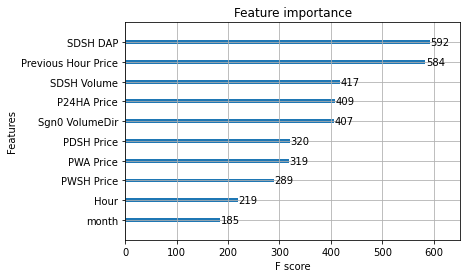

In [61]:
plot_importance(best_xgb_reg, max_num_features = 10)

## On test unseen data

In [62]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,11
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,11
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,11
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,11
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,11


In [63]:
y_pred_test = best_xgb_reg.predict(test)
y_pred_test

array([ 9122.054,  9584.472,  9584.472,  9584.472,  9869.824, 10104.229,
        9584.472, 10104.229, 10104.229, 10104.229, 10104.229,  9584.472,
        9584.472, 10104.229,  9584.472,  9584.472,  9584.472, 10104.229,
        9584.472,  9584.472,  9584.472,  9584.472,  9584.472,  9584.472,
        9122.054,  9584.472,  9584.472,  9584.472, 10104.229, 10104.229,
       10104.229, 10104.229, 10104.229, 10104.229, 10104.229,  9584.472,
        9584.472, 10104.229,  9584.472,  9584.472,  9584.472, 10104.229,
        9584.472,  9584.472,  9584.472,  9584.472,  9584.472,  9584.472,
        9122.054,  9584.472,  9584.472,  9584.472,  9765.505, 10104.229,
        9584.472, 10104.229, 10104.229, 10104.229, 10104.229,  9584.472,
        9584.472, 10104.229, 10104.229,  9584.472,  9584.472, 10104.229,
        9584.472,  9584.472,  9584.472,  9584.472,  9584.472,  9584.472,
        9122.054,  9584.472,  9584.472,  9584.472,  9843.376,  9584.472,
        9584.472, 10104.229, 10104.229, 10104.229, 

 ###  Modeling - LightGBM Regressor

In [64]:
gbm_param_grid = {'metric': ['rmse'],
                  'max_depth': [9,10,11,12,13], 
                  'bagging_fraction': [0.8, 0.9, 1],
                  'feature_fraction': [0.8, 0.9, 1],
                  'min_data_in_leaf': [20,50,80],
                  'learning_rate': [0.01,0.05,0.1,0.2]}

light_gbm_reg = lgb.LGBMRegressor(seed = 42, num_iterations = 1200)

light_gbm_grid = GridSearchCV(estimator = light_gbm_reg, param_grid = gbm_param_grid, cv=5, n_jobs=-1, verbose=1) 

light_gbm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 51.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 86.9min finished


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


GridSearchCV(cv=5, estimator=LGBMRegressor(num_iterations=1200, seed=42),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.8, 0.9, 1],
                         'feature_fraction': [0.8, 0.9, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [9, 10, 11, 12, 13], 'metric': ['rmse'],
                         'min_data_in_leaf': [20, 50, 80]},
             verbose=1)

In [65]:
light_gbm_grid.best_params_

{'bagging_fraction': 0.8,
 'feature_fraction': 0.8,
 'learning_rate': 0.01,
 'max_depth': 10,
 'metric': 'rmse',
 'min_data_in_leaf': 50}

In [66]:
best_light_gbm = light_gbm_grid.best_estimator_
y_pred_val = best_light_gbm.predict(X_val)

In [67]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,2041.18,2001.412918
1,1475.46,1674.111177
2,1579.12,1577.083525
3,1552.67,1589.277105
4,1721.17,1790.264675
...,...,...
1512,2441.90,2302.343560
1513,1685.98,1622.775586
1514,2535.42,2373.801260
1515,2100.73,2041.414697


In [68]:
# Store results as dataframe
lgbm_dict = {'Model':'LightGBM Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

lgbm_metrics = pd.DataFrame.from_dict(lgbm_dict, orient = 'index').T

# Show model performance metrics
lgbm_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,LightGBM Regressor,0.86512,0.864043,260.231,331361,575.64


In [69]:
lgb_features = pd.DataFrame([X_train.columns, best_light_gbm.feature_importances_]).T
lgb_features = lgb_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
lgb_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
4,SDSH DAP,5520
3,Previous Hour Price,5294
5,SDSH Volume,3240
7,P24HA Price,3211
6,Sgn0 VolumeDir,2827
8,PDSH Price,2485
9,PWSH Price,2096
10,PWA Price,1737
0,Hour,1718
11,month,1533


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

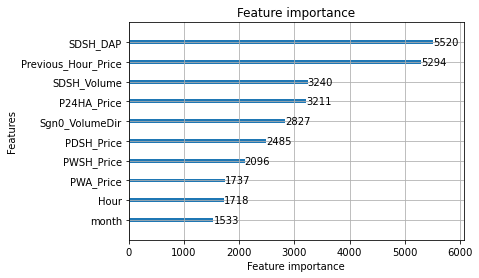

In [70]:
lgb.plot_importance(best_light_gbm, max_num_features = 10)

## On test unseen data

In [71]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,11
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,11
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,11
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,11
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,11


In [72]:
y_pred_test = best_light_gbm.predict(test)
y_pred_test

array([ 9837.34644125, 10401.04728367, 10401.04728367, 10401.04728367,
       10676.23923424, 10782.5413427 , 10401.04728367, 10782.5413427 ,
       10782.5413427 , 10782.5413427 , 10782.5413427 , 10401.04728367,
       10401.04728367, 10782.5413427 , 10401.04728367, 10401.04728367,
       10401.04728367, 10782.5413427 , 10401.04728367, 10401.04728367,
       10401.04728367, 10401.04728367, 10401.04728367, 10401.04728367,
        9837.34644125, 10401.04728367, 10401.04728367, 10401.04728367,
       10782.5413427 , 10782.5413427 , 10782.5413427 , 10782.5413427 ,
       10782.5413427 , 10782.5413427 , 10782.5413427 , 10401.04728367,
       10401.04728367, 10782.5413427 , 10401.04728367, 10401.04728367,
       10401.04728367, 10782.5413427 , 10401.04728367, 10401.04728367,
       10401.04728367, 10401.04728367, 10401.04728367, 10401.04728367,
        9702.42500701, 10266.12584944, 10266.12584944, 10266.12584944,
       10310.96077772, 10652.08479551, 10266.12584944, 10652.08479551,
      

### Modeling - CatBoost Regressor

In [73]:
# initialize Pool
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_val)

In [74]:
catboost_param_grid = {'learning_rate': [0.03, 0.1, 0.15],
                        'depth': [4,6,8,9,10,11],
                        'l2_leaf_reg': [1, 3, 5]}

In [75]:
# Initiate CatBoost regressor instance
catboost_reg = CatBoostRegressor(random_seed = 42, iterations=100, loss_function='RMSE')

catboost_reg_grid = GridSearchCV(estimator = catboost_reg, param_grid = catboost_param_grid, cv=5, n_jobs=-1, verbose=2) 

catboost_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 10.9min finished


0:	learn: 1487.9774811	total: 148ms	remaining: 14.6s
1:	learn: 1390.6373648	total: 159ms	remaining: 7.79s
2:	learn: 1297.3789232	total: 181ms	remaining: 5.86s
3:	learn: 1211.0552504	total: 192ms	remaining: 4.6s
4:	learn: 1142.0989843	total: 206ms	remaining: 3.92s
5:	learn: 1077.5277645	total: 215ms	remaining: 3.36s
6:	learn: 1018.2272816	total: 219ms	remaining: 2.91s
7:	learn: 968.7639380	total: 224ms	remaining: 2.58s
8:	learn: 923.1686295	total: 229ms	remaining: 2.31s
9:	learn: 882.4654694	total: 233ms	remaining: 2.1s
10:	learn: 846.3112922	total: 238ms	remaining: 1.93s
11:	learn: 816.0526299	total: 243ms	remaining: 1.78s
12:	learn: 786.2249045	total: 247ms	remaining: 1.66s
13:	learn: 759.6269215	total: 252ms	remaining: 1.55s
14:	learn: 737.2931715	total: 257ms	remaining: 1.46s
15:	learn: 717.4082110	total: 262ms	remaining: 1.37s
16:	learn: 700.9418595	total: 266ms	remaining: 1.3s
17:	learn: 684.6668707	total: 271ms	remaining: 1.24s
18:	learn: 670.5723992	total: 276ms	remaining: 1.18s

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002C95A803730>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 9, 10, 11],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.1, 0.15]},
             verbose=2)

In [76]:
catboost_reg_grid.best_params_

{'depth': 6, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

In [77]:
best_catboost_reg = catboost_reg_grid.best_estimator_

# Make prediction
y_pred_val = best_catboost_reg.predict(X_val)

In [78]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,2041.18,1991.886371
1,1475.46,1559.417497
2,1579.12,1583.507802
3,1552.67,1552.429959
4,1721.17,1792.591608
...,...,...
1512,2441.90,2212.163340
1513,1685.98,1704.892736
1514,2535.42,2440.297084
1515,2100.73,2188.754206


In [79]:
# Store results as dataframe
catboost_dict = {'Model':'CatBoost Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

catboost_metrics = pd.DataFrame.from_dict(catboost_dict, orient = 'index').T
catboost_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,CatBoost Regressor,0.879081,0.878116,246.641,297063,545.035


In [80]:
catboost_features = pd.DataFrame([X_train.columns, best_catboost_reg.feature_importances_]).T
catboost_features = catboost_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
catboost_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
4,SDSH DAP,46.5298
3,Previous Hour Price,28.1643
6,Sgn0 VolumeDir,5.19088
11,month,3.68137
5,SDSH Volume,3.59549
7,P24HA Price,3.5816
9,PWSH Price,2.16878
8,PDSH Price,2.12478
10,PWA Price,1.832
0,Hour,1.27689


## On test unseen data

In [81]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,11
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,11
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,11
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,11
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,11


In [82]:
y_pred_test = best_catboost_reg.predict(test)
y_pred_test

array([8940.88961927, 8859.08304388, 8859.08304388, 8859.08304388,
       9323.78959709, 9278.34688938, 8859.08304388, 9278.34688938,
       9278.34688938, 9278.34688938, 9278.34688938, 8859.08304388,
       8859.08304388, 9278.34688938, 8859.08304388, 8859.08304388,
       8859.08304388, 9278.34688938, 8859.08304388, 8859.08304388,
       8859.08304388, 8859.08304388, 8859.08304388, 8859.08304388,
       8940.88961927, 8859.08304388, 8859.08304388, 8859.08304388,
       9278.34688938, 9278.34688938, 9278.34688938, 9278.34688938,
       9278.34688938, 9278.34688938, 9278.34688938, 8859.08304388,
       8859.08304388, 9278.34688938, 8859.08304388, 8859.08304388,
       8859.08304388, 9278.34688938, 8859.08304388, 8859.08304388,
       8859.08304388, 8859.08304388, 8859.08304388, 8859.08304388,
       8940.88961927, 8859.08304388, 8859.08304388, 8859.08304388,
       8859.08304388, 9278.34688938, 8859.08304388, 9278.34688938,
       9278.34688938, 9278.34688938, 9278.34688938, 8859.08304

### Compare Models

In [83]:
df_metrics = pd.concat([linear_reg_metrics, rf_reg_metrics, xgb_metrics, lgbm_metrics, catboost_metrics])
df_metrics.sort_values(by = 'RMSE', ascending = True)

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Random Forest Regressor,0.880056,0.879099,245.179,294666,542.831
0,CatBoost Regressor,0.879081,0.878116,246.641,297063,545.035
0,XGBoost Regressor,0.868303,0.867252,254.051,323540,568.806
0,LightGBM Regressor,0.86512,0.864043,260.231,331361,575.64
0,Multi-Linear Regression,0.857144,0.856004,280.904,350955,592.415


In [84]:
# Omitting CatBoost result
df_metrics = pd.concat([linear_reg_metrics, rf_reg_metrics, xgb_metrics, lgbm_metrics])
df_metrics.sort_values(by = 'RMSE', ascending = True)

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Random Forest Regressor,0.880056,0.879099,245.179,294666,542.831
0,XGBoost Regressor,0.868303,0.867252,254.051,323540,568.806
0,LightGBM Regressor,0.86512,0.864043,260.231,331361,575.64
0,Multi-Linear Regression,0.857144,0.856004,280.904,350955,592.415


### Test with Liner Regression

In [93]:
#Liner Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([-7.70042183e+00, -1.12856045e+01, -1.67438873e+01,  6.17701897e+02,
        8.11047092e+02,  4.91757279e+01,  1.10947752e+02,  8.13785165e+01,
        7.97052730e+01,  7.23486701e+00, -2.00247905e+01, -3.18515447e-01])

In [94]:
y_predd = regressor.predict(X_val)
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
5907,2041.18,2117.992722
3762,1475.46,1681.346340
2956,1579.12,1562.492392
7024,1552.67,1510.391689
3015,1721.17,1702.394862
4365,2633.26,2408.718824
5703,2593.13,2530.193176
1522,2499.16,3374.634153
3165,6890.68,6634.052599
7371,1345.45,1281.221067


<AxesSubplot:xlabel='target', ylabel='Density'>

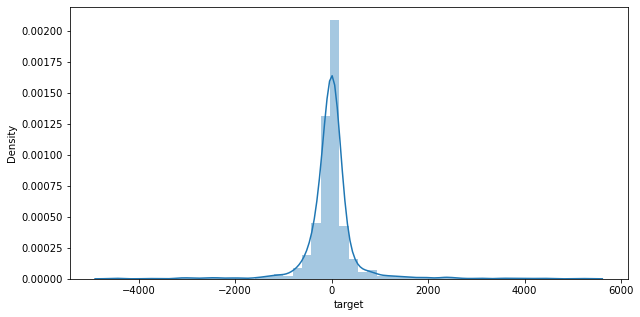

In [95]:
fig = plt.figure(figsize=(10,5))
residuals = (y_val- y_predd)
sns.distplot(residuals)

In [96]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_val, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_val, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_val, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_val,y_predd)))

Mean Absolute Error: 280.90
Mean Squared Error:350955.32
Root Mean Squared Error:592.41
Variance score is: 0.86


In [97]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Validation Score {:.2f}".format(regressor.score(X_val, y_val)))

Linear Regression Model:
Train Score 0.84
Validation Score 0.86


In [99]:
test[numerical_cols] = scaler.fit_transform(test[numerical_cols])
y_pred_test = regressor.predict(test)
y_pred_test

array([2131.42963327, 2091.98100861, 1605.26988017, 1497.51765814,
       1116.29862305, 1254.59300367, 1823.37434476, 2157.99143318,
       3370.60318214, 4685.0822919 , 6667.37769626, 3881.14520273,
       3290.22209563, 4995.90793698, 5531.98222576, 4243.70924163,
       3145.16222721, 4745.19968957, 3607.45334828, 2059.97738787,
       2056.44675653, 3710.07964463, 4098.58597747, 2368.92960133,
       2756.20711325, 2259.14352887, 2153.449257  , 2122.7973152 ,
       1811.85963207, 1249.62941662, 1435.68752511, 1716.94662204,
       2284.63359494, 1946.43984407, 2775.14909588, 2982.75384217,
       2539.11868828, 3237.14946247, 4450.50823191, 4013.06719916,
       3046.19818447, 4128.62097916, 3994.15888152, 3090.07561629,
       3848.57815533, 4472.51317658, 5699.46968798, 2855.78313471,
       2095.76208417, 1966.43290592, 2144.75046696, 1461.47550935,
       1661.3245665 , 1454.45661748, 1513.85584244,  548.1370444 ,
       2684.92205107, 3156.79738023, 3849.28669182, 2005.42795

### Ensembling & Stacking models

In [101]:
# Import libraries

from sklearn.model_selection import GridSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge

from mlxtend.regressor import StackingRegressor
from xgboost import XGBRegressor

# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [102]:
# segregating dataset into features i.e., X and target variables i.e., y
X = train_df.drop(['target','Date'],axis=1)
y = train_df['target']

In [103]:
# split into train test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [104]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6067, 12) (1517, 12) (6067,) (1517,)


### Feature Scaling

In [105]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)


### Simple Modeling

We will be evaluating below algorithms' root-mean-squared-error for train dataset.

- Ridge Regression
- Lasso Regression
- ElasticNet Regression
- Support Vector Machine
- Random Forest
- XG Boost

In [106]:
kfold = KFold(n_splits=20, random_state= 0, shuffle = True)

In [107]:
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)

## Ridge Regression

In [110]:
KR = KernelRidge()

KR_param_grid = {
    'alpha' : [10, 5, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'kernel' : ['rbf','poly'],
    'gamma':[1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'degree': [3],
    'coef0': [1.5]
}

KR_CV = GridSearchCV(KR, param_grid = KR_param_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1, verbose = 1)
KR_CV.fit(X_train, y_train)
KR_best = KR_CV.best_estimator_
print(KR_best)

Fitting 20 folds for each of 96 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 114.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 180.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 251.8min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 266.4min finished


KernelRidge(alpha=0.1, coef0=1.5, gamma=0.01, kernel='rbf')


In [114]:
y_pred_val = KR_best.predict(X_val)

In [115]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,1440.21,1593.094702
1,1953.76,2122.175633
2,1470.31,1550.883562
3,1938.13,2248.842872
4,1663.24,1725.733975
...,...,...
1512,1607.03,1501.878678
1513,2451.94,2568.449239
1514,1598.88,1487.551199
1515,2314.20,2422.654001


In [112]:
score = rmsle_cv(KR_best)
print("Kernel Ridge mean score:", score.mean())
print("Kernel Ridge std:", score.std())

Kernel Ridge mean score: 597.724339535025
Kernel Ridge std: 125.95400077891573


In [122]:
# Store results as dataframe
KR_dict = {'Model':'Ridge Regression Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

KR_metrics = pd.DataFrame.from_dict(KR_dict, orient = 'index').T
KR_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Ridge Regression Regressor,0.861377,0.860271,268.775,334840,578.653


In [120]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()
test = scaler.fit_transform(test)

In [121]:
y_pred_test = KR_best.predict(test)
y_pred_test

array([1934.04873441, 1876.76497821, 1547.52819267, 1446.11795564,
       1065.08352345, 1141.27564578, 1605.64479346, 1786.97285947,
       3171.20230809, 4766.44346387, 7001.85480704, 3720.79808287,
       3098.03119004, 5321.74604798, 5838.91285857, 4078.05766412,
       2984.34165313, 5069.9031465 , 3426.50715034, 1953.05614348,
       1953.45973744, 3181.18659541, 3874.4607874 , 2294.3646853 ,
       2614.77165707, 2161.98294819, 2069.24349482, 2100.58407711,
       1832.41201657, 1232.52093807, 1399.90119445, 1384.77568432,
       2083.27022915, 1774.80429885, 2737.63386152, 2863.57627547,
       2491.69174962, 3385.41816588, 4775.50294028, 4125.95331853,
       2988.38883824, 4642.06738957, 3878.66328988, 3129.16327619,
       3875.3698862 , 4059.62482121, 5153.90293149, 2823.93178678,
       2253.42414309, 2079.24182676, 2239.24397926, 1780.79857891,
       1753.82275144, 1682.19710124, 1791.35963519,  339.09960675,
       2534.06378031, 3169.57148565, 4145.84897748, 1948.34447

## Lasso Regression

In [123]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01,
                          0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2], random_state = 1, n_jobs = -1, verbose = 1)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Optimized Alpha:", alpha)

lasso = LassoCV(alphas = alpha * np.linspace(0.5,1.5,20), cv = kfold, random_state = 1, n_jobs = -1)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Final Alpha:", alpha)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
...............................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


Optimized Alpha: 1.2
Final Alpha: 1.7999999999999998


In [124]:
y_pred_val = lasso.predict(X_val)

In [125]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,1440.21,1480.287622
1,1953.76,2118.062991
2,1470.31,1433.514367
3,1938.13,2308.973200
4,1663.24,1703.110880
...,...,...
1512,1607.03,1451.819968
1513,2451.94,2581.962815
1514,1598.88,1302.712723
1515,2314.20,2299.246824


In [126]:
# Store results as dataframe
lasso_dict = {'Model':'lasso Regression Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

lasso_metrics = pd.DataFrame.from_dict(lasso_dict, orient = 'index').T
lasso_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,lasso Regression Regressor,0.839561,0.838281,291.154,387536,622.524


In [127]:
print("Lasso mean score:", rmsle_cv(lasso).mean())
print("Lasso std:", rmsle_cv(lasso).std())

Lasso mean score: 622.6103395730108
Lasso std: 134.29936540070872


In [128]:
y_pred_test = lasso.predict(test)
y_pred_test

array([2126.7224585 , 2080.46002937, 1595.47581425, 1488.63460351,
       1100.4563812 , 1237.89115479, 1801.81201243, 2144.65080309,
       3347.28325411, 4672.98781092, 6662.21849748, 3900.20514673,
       3276.21620021, 4984.17025724, 5567.85752177, 4249.92665562,
       3152.2660533 , 4712.19697658, 3613.32654643, 2037.90840351,
       2036.73964271, 3682.16254028, 4102.34670957, 2358.94768893,
       2756.27379274, 2268.68788897, 2165.23421412, 2131.61304933,
       1817.19399936, 1262.83740583, 1452.32256258, 1724.67956963,
       2294.5752376 , 1973.49275834, 2809.00588086, 3006.67612898,
       2553.9067769 , 3271.12540297, 4509.26335781, 4068.85486058,
       3093.34631851, 4122.1236044 , 4030.37793423, 3081.76364912,
       3829.95079561, 4454.96437225, 5700.31072377, 2875.11256466,
       2083.08681334, 1958.65359669, 2130.67601146, 1421.77656089,
       1640.07089304, 1418.87915549, 1478.68089466,  545.78743584,
       2689.81668739, 3169.01028134, 3852.58563801, 2030.08728

### ElasticNet Regression

In [129]:
elnet = ElasticNetCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2] 
                ,l1_ratio = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
                ,cv = kfold, random_state = 1, n_jobs = -1)

elnet.fit(X_train, y_train)

alpha = elnet.alpha_
ratio = elnet.l1_ratio_

print("Optimized Alpha:", alpha)
print("Optimized l1_ratio:", ratio)

elnet = ElasticNetCV(alphas = alpha * np.linspace(0.5,1.5,20), l1_ratio = ratio * np.linspace(0.9,1.3,6), 
                     cv = kfold, random_state = 1, n_jobs = -1)
elnet.fit(X_train, y_train)

alpha = elnet.alpha_
ratio = elnet.l1_ratio_

print("Final Alpha:", alpha)
print("Final l1_ratio:", ratio)

Optimized Alpha: 1.2
Optimized l1_ratio: 1.0
Final Alpha: 0.6
Final l1_ratio: 0.98


In [130]:
y_pred_val = elnet.predict(X_val)

In [131]:

result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,1440.21,1476.888587
1,1953.76,2110.398580
2,1470.31,1440.173675
3,1938.13,2310.361529
4,1663.24,1701.469102
...,...,...
1512,1607.03,1454.901886
1513,2451.94,2584.869054
1514,1598.88,1301.954132
1515,2314.20,2296.110314


In [133]:
# Store results as dataframe
elnet_dict = {'Model':'ElasticNet Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

elnet_metrics = pd.DataFrame.from_dict(elnet_dict, orient = 'index').T
elnet_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,ElasticNet Regressor,0.839722,0.838443,292.92,387148,622.212


In [134]:
print("ElasticNet mean score:", rmsle_cv(elnet).mean())
print("ElasticNet std:", rmsle_cv(elnet).std())

ElasticNet mean score: 622.734724799149
ElasticNet std: 133.81754220147084


## Support Vector Machine

In [135]:
epsilons = [0.03]
degrees = [2]
coef0s = [1.6]

gammas = ['auto']
Cs = [0.1]
kernels = ['poly']

param_grid = dict(C=Cs, epsilon = epsilons, gamma=gammas, kernel=kernels, degree= degrees, coef0=coef0s)
SVMR = GridSearchCV(SVR(), param_grid = param_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1,verbose = 1)

SVMR.fit(X_train,y_train)
SVMR_best = SVMR.best_estimator_
print(SVMR.best_params_)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.0s finished


{'C': 0.1, 'coef0': 1.6, 'degree': 2, 'epsilon': 0.03, 'gamma': 'auto', 'kernel': 'poly'}


In [136]:
y_pred_val = SVMR.predict(X_val)
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,1440.21,1771.397075
1,1953.76,1950.739568
2,1470.31,1796.008759
3,1938.13,1989.240315
4,1663.24,1826.543076
...,...,...
1512,1607.03,1851.420150
1513,2451.94,2021.141118
1514,1598.88,1831.307519
1515,2314.20,1974.754863


In [137]:
# Store results as dataframe
SVMR_dict = {'Model':'SVM Regression Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

SVMR_metrics = pd.DataFrame.from_dict(SVMR_dict, orient = 'index').T
SVMR_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,SVM Regression Regressor,0.307168,0.30164,604.432,1.67352e+06,1293.64


In [138]:
print("SVM mean score:", rmsle_cv(SVMR_best).mean())
print("SVM std:", rmsle_cv(SVMR_best).std())

SVM mean score: 1349.289483337768
SVM std: 209.11302367262775


## Random Forest

In [139]:
RFC = RandomForestRegressor(random_state = 1)

rf_param_grid = {"max_depth": [None],
              "max_features": [11],
              "min_samples_leaf": [1],
              "n_estimators" :[570]
                }

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv = kfold, scoring = "neg_mean_squared_error", n_jobs = -1, verbose = 1)
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_
print(gsRFC.best_params_)


# cv = 20 (Scaler)
# {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 88, 'n_estimators': 600}
# {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 88, 'n_estimators': 570} - 0.13778

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.4min finished


{'max_depth': None, 'max_features': 11, 'min_samples_leaf': 1, 'n_estimators': 570}


In [140]:
y_pred_val = gsRFC.predict(X_val)
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,1440.21,1643.433222
1,1953.76,2235.765351
2,1470.31,1523.798657
3,1938.13,2232.721544
4,1663.24,1697.301477
...,...,...
1512,1607.03,1467.027018
1513,2451.94,2571.948719
1514,1598.88,1481.316487
1515,2314.20,2357.710684


In [141]:
# Store results as dataframe
gsRFC_dict = {'Model':'gsRFC Regression Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

gsRFC_metrics = pd.DataFrame.from_dict(gsRFC_dict, orient = 'index').T
gsRFC_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,gsRFC Regression Regressor,0.848837,0.847631,259.392,365131,604.261


In [142]:
print("Random Forest mean score:", rmsle_cv(RFC_best).mean())
print("Random Forest std:", rmsle_cv(RFC_best).std())

Random Forest mean score: 607.8263564043357
Random Forest std: 121.14123030268229


## XG Boost

In [143]:
XGB = XGBRegressor()

xg_param_grid = {
              'n_estimators' :[870],
              'learning_rate': [0.04],
              
              'max_depth': [3],
              'min_child_weight':[0.2],
              
              'gamma': [0],
                
              'subsample':[0.8],
              'colsample_bytree':[0.7]
    
              #'reg_alpha':[0.08,0.09,0.095,0.1,0.15,0.2],
              #'reg_lambda':[0,0.001,0.002]
              }
                
gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_train)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 3, 'min_child_weight': 0.2, 'n_estimators': 870, 'subsample': 0.8}


In [144]:
y_pred_val = gsXGB.predict(X_val)
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,1440.21,1589.607178
1,1953.76,2092.238770
2,1470.31,1589.040405
3,1938.13,2231.317871
4,1663.24,1677.630615
...,...,...
1512,1607.03,1533.190186
1513,2451.94,2493.547119
1514,1598.88,1540.558838
1515,2314.20,2366.571777


In [147]:
# Store results as dataframe
gsXGB_dict = {'Model':'gsXGB Regression Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

gsXGB_metrics = pd.DataFrame.from_dict(gsXGB_dict, orient = 'index').T
gsXGB_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,gsXGB Regression Regressor,0.840307,0.839033,271.627,385735,621.075


In [146]:
print("XG Boost mean score:", rmsle_cv(XGB_best).mean())
print("XG Boost std:", rmsle_cv(XGB_best).std())

XG Boost mean score: 595.3835967708266
XG Boost std: 128.37972258315313
